<a href="https://colab.research.google.com/github/Vaibhavkat/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Load the dataset
data = pd.read_csv('Online Retail.csv')

In [ ]:
# Display the first few rows of the dataset
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [ ]:
# Data Cleaning
# Check for missing values
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# Drop rows with missing CustomerID
data.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
# Create a TotalAmount column
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

# Aggregating data at the customer level
customer_data = data.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Frequency
    'Quantity': 'sum',       # Total Quantity
    'TotalAmount': 'sum'     # Total Amount Spent
}).reset_index()

# Renaming columns for clarity
customer_data.columns = ['CustomerID', 'Frequency', 'TotalQuantity', 'TotalAmount']

# Display the first few rows of aggregated data
print(customer_data.head())


   CustomerID  Frequency  TotalQuantity  TotalAmount
0     12346.0          2              0         0.00
1     12347.0          7           2458      4310.00
2     12348.0          4           2341      1797.24
3     12349.0          1            631      1757.55
4     12350.0          1            197       334.40


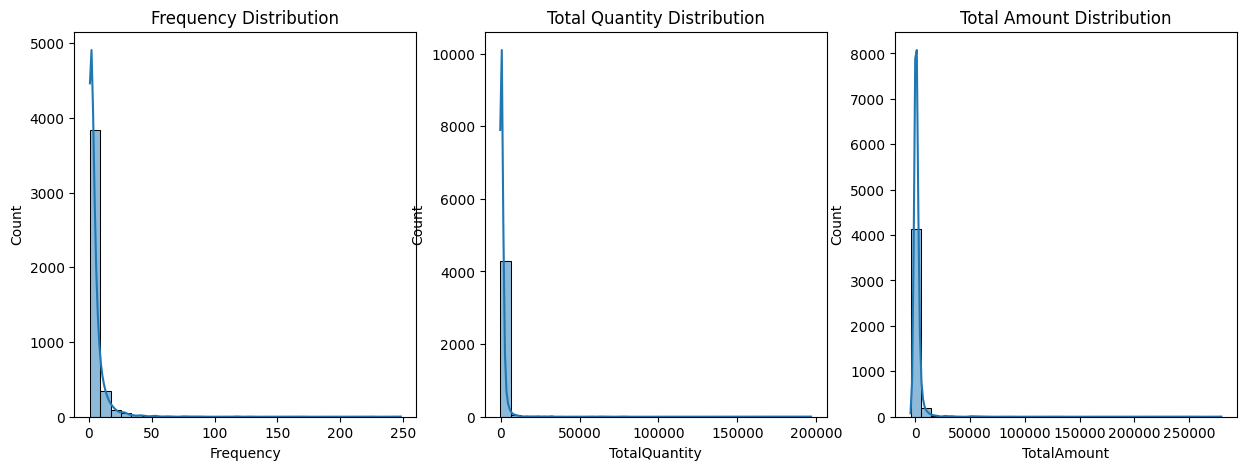

In [ ]:
# Exploratory Data Analysis (EDA)
# Visualize the distribution of Frequency, TotalQuantity, and TotalAmount
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(customer_data['Frequency'], kde=True, bins=30)
plt.title('Frequency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(customer_data['TotalQuantity'], kde=True, bins=30)
plt.title('Total Quantity Distribution')

plt.subplot(1, 3, 3)
sns.histplot(customer_data['TotalAmount'], kde=True, bins=30)
plt.title('Total Amount Distribution')
plt.show()


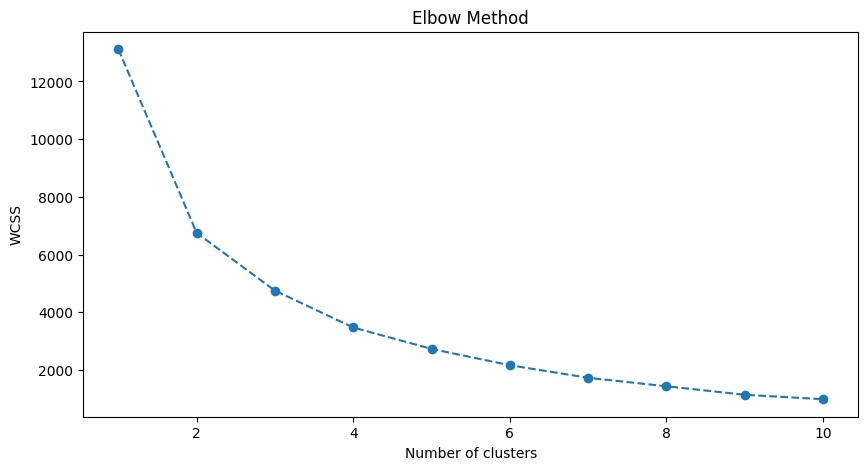

In [ ]:
# Feature Engineering
# Select relevant features for clustering
features = customer_data[['Frequency', 'TotalQuantity', 'TotalAmount']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



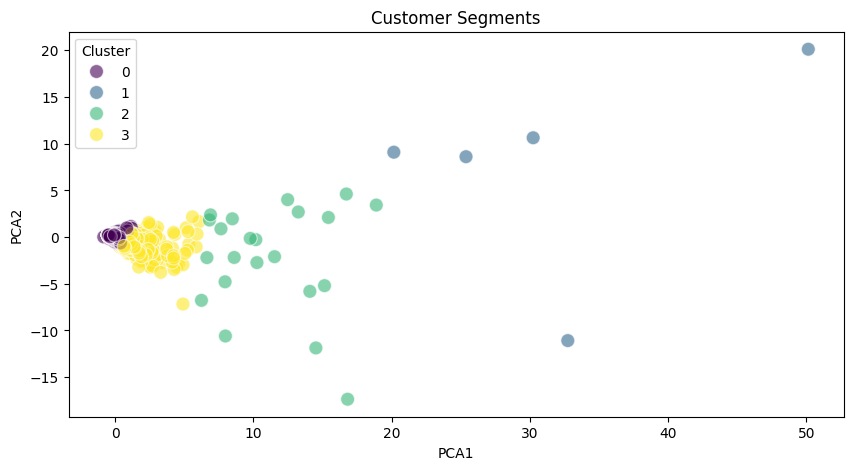

In [ ]:
# From the Elbow Method graph, let's assume the optimal number of clusters is 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the customer_data
customer_data['Cluster'] = clusters

# Visualize the clusters using PCA (for 2D visualization)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
pca_data = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])
pca_data['Cluster'] = clusters

plt.figure(figsize=(10, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_data, palette='viridis', s=100, alpha=0.6)
plt.title('Customer Segments')
plt.show()

In [ ]:
# Summarize the findings
print(customer_data.groupby('Cluster').mean())

# Save the segmented data to a new CSV file
customer_data.to_csv('customer_segments.csv', index=False)

print("Customer segmentation completed and saved to 'customer_segments.csv'")

           CustomerID  Frequency  TotalQuantity    TotalAmount
Cluster                                                       
0        15313.124686   3.243841     562.685772     921.860531
1        15504.800000  93.600000   96858.400000  195941.550000
2        15235.954545  75.136364   31949.818182   47483.389091
3        15154.948229  19.523161    4036.337875    7107.799210
Customer segmentation completed and saved to 'customer_segments.csv'
